In [20]:
import pandas as pd
fold_2=pd.read_csv("fold2-5_picture/fold2_transunet_4.csv",sep='\t')
fold_3=pd.read_csv("fold2-5_picture/fold3_transunet_4.csv",sep='\t')
fold_4=pd.read_csv("fold2-5_picture/fold4_transunet_4.csv",sep='\t')
fold_5=pd.read_csv("fold2-5_picture/fold5_transunet_4.csv",sep='\t')

In [21]:
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import colors as mcolors ## 顏色集
colors=list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())[::-1]
a=colors.pop()
b=colors.pop()
c=colors.pop()
def picture(name,a,b,c):    
    fig, ax1 = plt.subplots()
    plt.xlabel('Epoch')
    ax2 = ax1.twinx()

    ax1.set_ylabel('IoU', color=a)

    ax1.plot(range(1,len(fold_5['IoU'])+1),fold_5['IoU'],color=c,label="IoU")
    ax1.plot(range(1,len(fold_5[name])+1),fold_5[name],color=a,label=name)
    ax1.tick_params(axis='y', labelcolor=a)
    
    ax2.set_ylabel('learning_rate', color=b)
    ax2.plot(range(1,len(fold_5["lr"])+1),fold_5["lr"],color=b,label='lr')
    ax2.tick_params(axis='y', labelcolor=b)

    # 連接兩個Y軸的圖例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels, loc='center right')

    if 'val' in name:
        plt.title("val IoU ")
    else:
       plt.title("train IoU ")   
    fig.tight_layout()     
    plt.grid(True)#有網格
    # plt.legend()#可以印出label
    plt.show()

def picture_set(name):    
    # 對訓練過程的mse繪圖
    plt.figure(figsize =(8,5))
    plt.plot(range(1,len(set_1[name])+1),set_1[name],label='set_1')
    plt.plot(range(1,len(set_2[name])+1),set_2[name],label='set_2')
    plt.plot(range(1,len(set_3[name])+1),set_3[name],label='set_3')
    plt.plot(range(1,len(set_4[name])+1),set_4[name],label='set_4')
    # plt.xticks(range(1,len(model_train.history[val_loss])+1))
    plt.ylabel(f"{name}")
    plt.xlabel("epoch")
    if 'val' in name:
        plt.title("val IoU ")
    else:
       plt.title("train IoU ")     
    plt.grid(True)#有網格
    plt.legend()#可以印出label
    plt.show()   

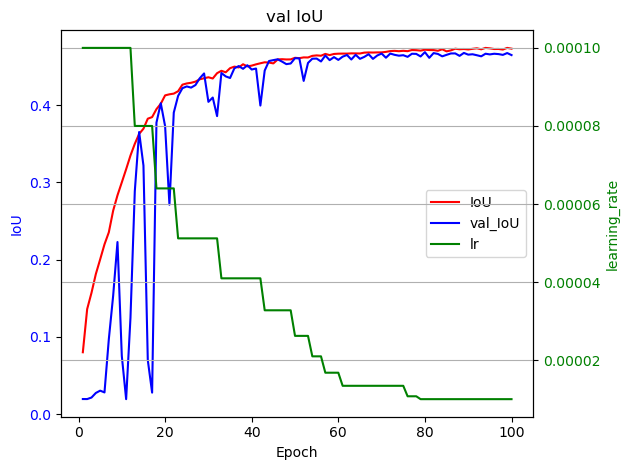

In [22]:
picture('val_IoU',a,b,c)

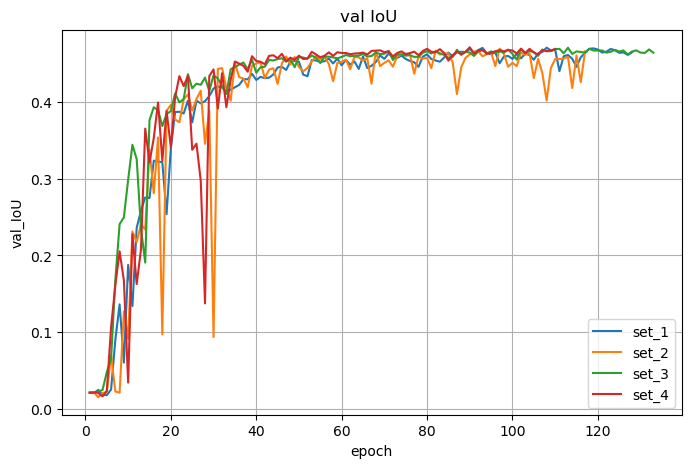

In [88]:
picture_set('val_IoU')